In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from IPython.display import Math, display
from scipy import stats
from sklearn.linear_model import LinearRegression

# Task 1

### Load & Clean Data

In [26]:
df = pd.read_csv("IBM-Apple-SP500 RR Data.csv", header=1)
df.head()

,Date,S&P 500,IBM,Apple,Unnamed: 4
0,9/3/2013,3.95%,4.22%,0.39%,NaN
1,8/1/2013,-3.13%,-6.08%,8.38%,NaN
2,7/1/2013,4.95%,2.06%,14.12%,NaN
3,6/3/2013,-1.50%,-8.13%,-11.83%,NaN
4,5/1/2013,2.08%,3.19%,2.24%,NaN


In [27]:
df.drop(columns=["Unnamed: 4"], inplace=True)
for col in ["IBM", "Apple", "S&P 500"]:
    df[col] = df[col].astype(str).str.replace("%", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce") / 100.0

In [28]:
df.head()

,Date,S&P 500,IBM,Apple
0,9/3/2013,0.0395,0.0422,0.0039
1,8/1/2013,-0.0313,-0.0608,0.0838
2,7/1/2013,0.0495,0.0206,0.1412
3,6/3/2013,-0.0150,-0.0813,-0.1183
4,5/1/2013,0.0208,0.0319,0.0224


### 1a) Make Scatter Plots of rates of return of IBM vs. S&P 500 and of Apple vs. S&P 500 and comment on them.

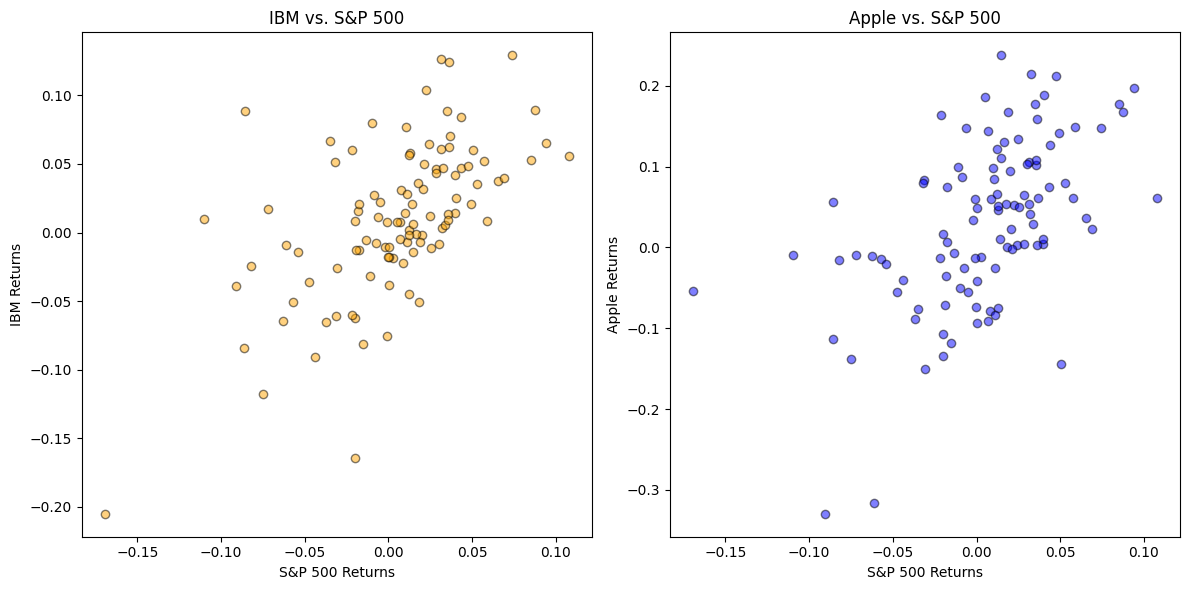

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].scatter(df["S&P 500"], df["IBM"], color="orange", edgecolors="black", alpha=0.5)
ax[0].set_title("IBM vs. S&P 500")
ax[0].set_xlabel("S&P 500 Returns")
ax[0].set_ylabel("IBM Returns")

ax[1].scatter(df["S&P 500"], df["Apple"], color="blue", edgecolors="black", alpha=0.5)
ax[1].set_title("Apple vs. S&P 500")
ax[1].set_xlabel("S&P 500 Returns")
ax[1].set_ylabel("Apple Returns")

plt.tight_layout()
plt.show()

The scatter plots show that there is a linear relationship between S&P 500 return rates and both Apple and IBM return rates. Although there is a good amount of noise visible, the return rates for both APple and IBM tend to go up as S&D 500 goes up.

### 1b) Calculate the $\beta$'s for IBM and Apple with reference to S&P 500. Comment on the relative magnitudes of the $\beta$'s. Which stock had a higher expected return relative to S&P 500?

In [30]:
X = sm.add_constant(df["S&P 500"])
y = df["IBM"]
model = sm.OLS(y, X).fit()
beta_ibm = model.params["S&P 500"]
display(Math(rf"IBM: \hat\beta_1 = {beta_ibm:.3f}"))

<IPython.core.display.Math object>

In [31]:
X = sm.add_constant(df["S&P 500"])
y = df["Apple"]
model = sm.OLS(y, X).fit()
beta_apple = model.params["S&P 500"]
display(Math(rf"Apple: \hat\beta_1 = {beta_apple:.3f}"))

<IPython.core.display.Math object>

The estimated $\beta$ for IBM is 0.74, while Apple’s $\beta$ is 1.24. This indicates that IBM is less volatile than the market, behaving more defensively, while Apple is more sensitive to market movements and carries higher systematic risk. Since Apple has a higher $\beta$, it also has a higher expected return relative to the S&P 500, whereas IBM’s expected return will be lower.

### 1c) Calculate the sample standard deviations (SDs) of the rates of return for S&P 500, IBM and Apple. Also calculate the correlation matrix. Check that $\hat{\beta} = r s_y / s_x$ for each stock where r is the correlation coefficient between S&P 500 and the given stock $s_x$ is the SD of S&P 500 and $s_y$ is the sample SD of the given stock.

In [32]:
sy_sp500 = np.std(df["S&P 500"], ddof=1)
sy_ibm = np.std(df["IBM"], ddof=1)
sy_apple = np.std(df["Apple"], ddof=1)

display(Math(rf"S\&P \space  500: s_y = {sy_sp500:.3f}"))
display(Math(rf"IBM: s_y = {sy_ibm:.3f}"))
display(Math(rf"Apple: s_y = {sy_apple:.3f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
corr_matrix = df[["S&P 500", "IBM", "Apple"]].corr()
print(corr_matrix)

          S&P 500       IBM     Apple
S&P 500  1.000000  0.597478  0.538232
IBM      0.597478  1.000000  0.414725
Apple    0.538232  0.414725  1.000000


In [34]:
print(
    f"IBM: {corr_matrix.loc['S&P 500', 'IBM'] * sy_ibm / sy_sp500:.3f} = {beta_ibm:.3f}"
)
print(
    f"Apple: {corr_matrix.loc['S&P 500', 'Apple'] * sy_apple / sy_sp500:.3f} = {beta_apple:.3f}"
)

IBM: 0.745 = 0.745
Apple: 1.245 = 1.245


### 1d) Explain based on the statistics calculated how a higher expected return is accompanied by a higher volatility of the Apple stock.

Based on the calculated statistics, Apple has a higher $\beta$ (1.24) compared to IBM (0.74), which indicates that Apple is more sensitive to market movements. This higher systematic risk is accompanied by a higher standard deviation of returns, reflecting greater day-to-day fluctuations, which means there is a higher volatility of the Apple stock.

# Task 2

### Load & Clean Data

In [35]:
df = pd.read_csv("auto.txt", sep=r"\s+", quotechar='"', na_values="?")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [36]:
df["origin"] = df["origin"].astype("category")
df = df.dropna(subset=["mpg", "horsepower"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Create Model

In [37]:
X = sm.add_constant(df["horsepower"])
y = df["mpg"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        19:32:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

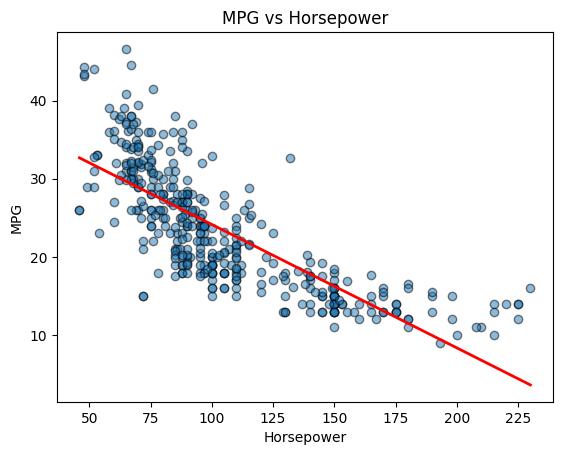

In [38]:
plt.scatter(df["horsepower"], df["mpg"], edgecolors="black", alpha=0.5)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")

hp_vals = np.linspace(df["horsepower"].min(), df["horsepower"].max(), 100)
mpg_pred = model.params["const"] + model.params["horsepower"] * hp_vals
plt.plot(hp_vals, mpg_pred, color="red", linewidth=2)

plt.show()

### 2a) What is the estimated regression equation?

$\hat{MPG} = 39.9359 - 0.1578 \cdot Horsepower$

### 2b) What does the slope tell you?

For each additional unit of horsepower, the predicted miles per gallon (mpg) decreases by approximately 0.158

### 2c) How much uncertainty is associated with the slope estimate?

The slope’s standard error is 0.006, meaning that the estimated slope typically varies by about 0.006 across samples. This yields a 95% confidence interval of [-0.171, -0.145], which is expected to contain the true slope 95% of the time.

### 2d) What does the residual standard error tell you?

The residual standard error is the typical distance that the observed values fall from the fitted regression line.

### 2e) Using this model, is there a significant relationship between mpg and horsepower?

Yes, there is a significant relationship between mpg and horsepower, because the 95% confidence interval for the slope [-0.171, -0.145] does not include 0

### 2f) What fraction of the variation in mpg is explained by using this linear function?

$R^2 = 0.606$, which means $60.6\%$ of total variation is explained by the model.

### 2g) What is the predicted mpg associated with a horsepower of 98?

In [39]:
pred = model.predict([1, 98])[0]  # 1 to multiply with intercept

print(f"Predicted MPG for Horsepower of 98: {pred:.2f} MPG")

Predicted MPG for Horsepower of 98: 24.47 MPG


### 2h) What is the 95% prediction interval for the predicted mpg associated with a horsepower of 98? For what types of questions would it be appropriate to look at the PI?

In [40]:
pi_lower, pi_upper = (
    model.get_prediction([1, 98])
    .summary_frame(alpha=0.05)
    .loc[0, ["obs_ci_lower", "obs_ci_upper"]]
)
print(f"95% PI: [{pi_lower:.2f}, {pi_upper:.2f}]")

95% PI: [14.81, 34.12]


<ul>
  <li>If I buy a car with 98 horsepower, what range of mpg can I expect?</li>
  <li>What is the likely mpg for a test car I haven’t seen yet?</li>
</ul>

### 2i) What is the 99% confidence interval for the mean prediction of mpg when horsepower is 98? For what types of questions would it be appropriate to look at the CI for mean prediction?

In [41]:
ci_lower, ci_upper = (
    model.get_prediction([1, 98])
    .summary_frame(alpha=0.01)
    .loc[0, ["mean_ci_lower", "mean_ci_upper"]]
)
print(f"99% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

99% CI: [23.82, 25.12]


<ul>
    <li> What is the 99% confidence interval for the expected mean fuel consumption of cars with 98 horsepower?
</ul>

### 2j) What is a 90% confidence interval for the slope?

In [42]:
slope = model.params["horsepower"]
se_slope = model.bse["horsepower"]


deg_of_freedom = model.df_resid
t_crit = stats.t.ppf(1 - 0.005, deg_of_freedom)

print(f"99% CI: [{slope - t_crit * se_slope:.3f}, {slope + t_crit * se_slope:.3f}]")

99% CI: [-0.175, -0.141]


### 2k) In looking at the scatterplot and fitted model, note any violations of the model assumptions.

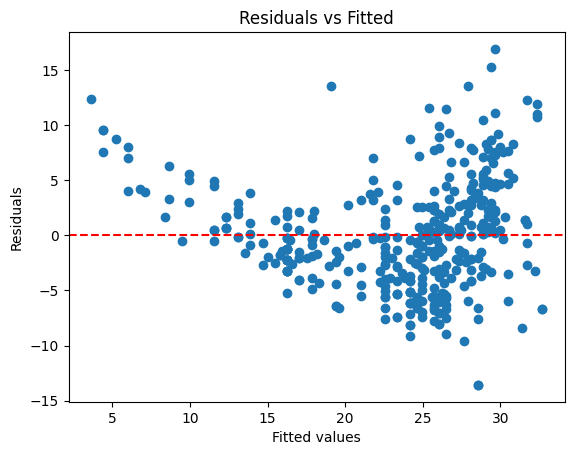

In [43]:
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

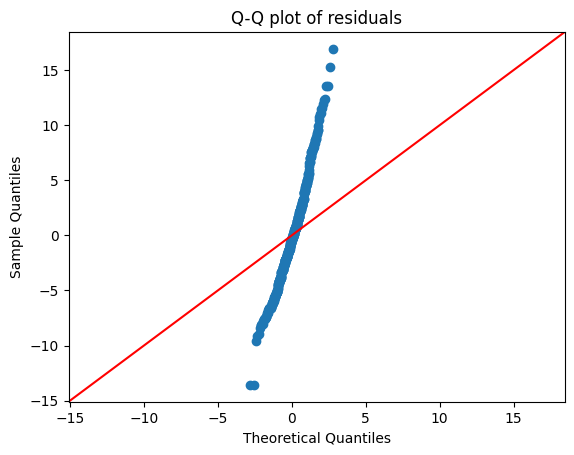

In [44]:
sm.qqplot(residuals, line="45")
plt.title("Q-Q plot of residuals")
plt.show()

 # Task 3

C:\Users\Johannes\AppData\Local\Temp\ipykernel_24324\2243701982.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("auto.txt", delim_whitespace=True, na_values="?")


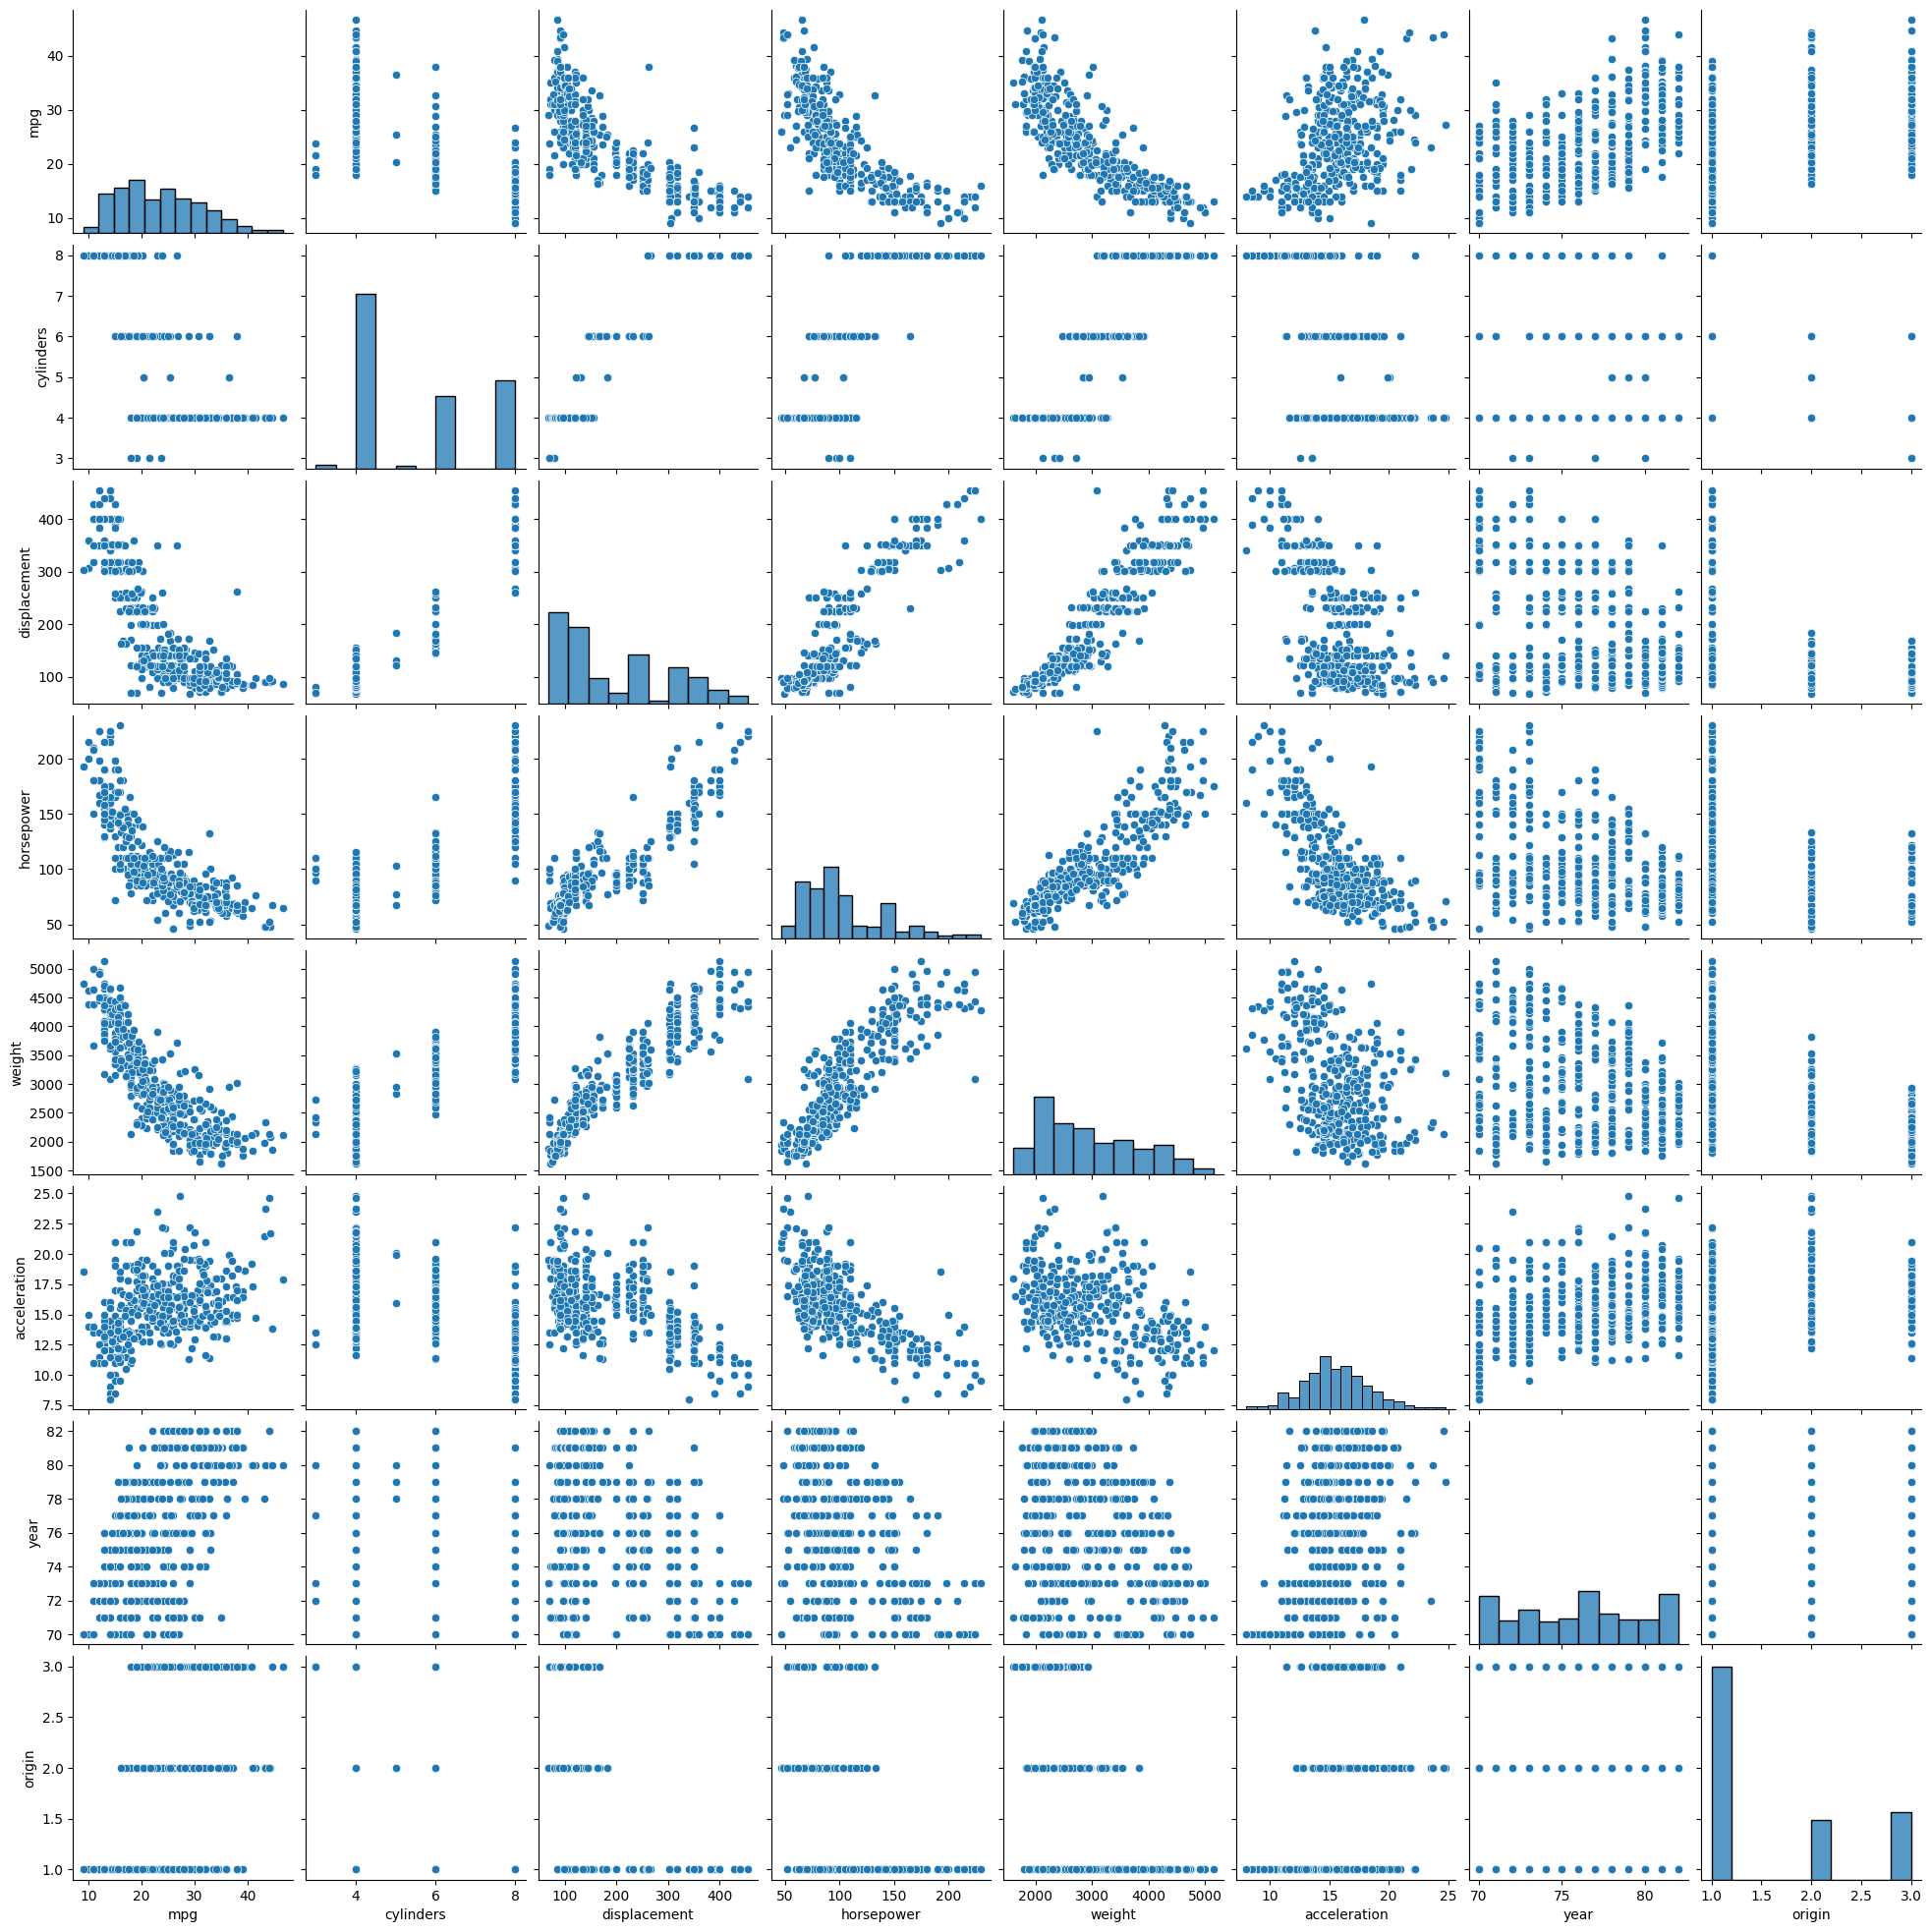

In [45]:
df = pd.read_csv("auto.txt", delim_whitespace=True, na_values="?")
sns.pairplot(df.drop(columns=["name"]))
plt.show()

In [46]:
corr_matrix = df.drop(columns=["name"]).corr()
print(corr_matrix.round(4))

                 mpg  cylinders  displacement  horsepower  weight  \
mpg           1.0000    -0.7763       -0.8044     -0.7784 -0.8317   
cylinders    -0.7763     1.0000        0.9509      0.8430  0.8970   
displacement -0.8044     0.9509        1.0000      0.8973  0.9331   
horsepower   -0.7784     0.8430        0.8973      1.0000  0.8645   
weight       -0.8317     0.8970        0.9331      0.8645  1.0000   
acceleration  0.4223    -0.5041       -0.5442     -0.6892 -0.4195   
year          0.5815    -0.3467       -0.3698     -0.4164 -0.3079   
origin        0.5637    -0.5650       -0.6107     -0.4552 -0.5813   

              acceleration    year  origin  
mpg                 0.4223  0.5815  0.5637  
cylinders          -0.5041 -0.3467 -0.5650  
displacement       -0.5442 -0.3698 -0.6107  
horsepower         -0.6892 -0.4164 -0.4552  
weight             -0.4195 -0.3079 -0.5813  
acceleration        1.0000  0.2829  0.2101  
year                0.2829  1.0000  0.1843  
origin            

In [47]:
df_num = df.select_dtypes(include=[np.number])
df_num = df_num.dropna()

x = df_num.drop("mpg", axis=1)
y = df_num["mpg"]

model = LinearRegression()
model.fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

x_sm = sm.add_constant(x)

model_sm = sm.OLS(y, x_sm).fit()

print(model_sm.summary())

Coefficients: [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
Intercept: -17.218434622017593
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 23 Sep 2025   Prob (F-statistic):          2.04e-139
Time:                        19:32:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.97

Comment: 
         1. Yes, there is a relationship. The overall F-test has a p-value of 2.04e-139 which is really small. This means the predictors have a statistically significant effect on "mpg". 
         2. these p values:
Displacement (p = 0.008); Weight (p = 0.000); Year (p = 0.000); Origin (p = 0.000); are smaller than 0.05, so they are statistically significant. Cylinders, horsepower, and acceleration do not appear to have a statistically significant effect in this model.
         3. The coefficient for "year" is 0.7508. This suggests that each additional model year may increase about 0.7508 mpg in fuel efficiency when holding all other variables constant. So the newer cars will be more fuel-saving when other factors are equal.

### a) based on the scatterplots, comment on the relationships between the predictors and mpg.

<b>Negative Relationships:</b>
<ul>
    <li> <b>Displacement vs mpg</b>:
Larger engine displacement is strongly associated with lower mpg. The scatter shows a clear downward trend.</li>
    <li><b>Horsepower vs mpg:</b>
Cars with higher horsepower tend to have lower mpg. This is also a strong, roughly linear negative relationship.</li>
    <li><b>Weight vs mpg:</b>
Heavier cars generally have much lower mpg. This is one of the strongest negative correlations in the plot.</li>
</ul>

<b>Moderate Relationships:</b>
<ul>
    <li> <b>Cylinders vs mpg</b>:
Cars with more cylinders (e.g., 6, 8) tend to have much lower mpg, while 4-cylinder cars have higher mpg. This is a step-like pattern since “cylinders” is categorical.</li>
</ul>

<b>Positive Relationships:</b>
<ul>
    <li> <b>Year vs mpg</b>:
Newer model years are associated with higher mpg. This reflects improvements in fuel efficiency over time.</li>
</ul>

<b>Weak/Unclear Relationships:</b>
<ul>
    <li> <b>Acceleration vs mpg</b>:
There isn’t a strong linear relationship. The scatter looks diffuse, with perhaps a slight positive trend (cars with higher acceleration have slightly better mpg), but it’s weak.</li>
    <li><b>Origin vs mpg:</b>
Since “origin” is categorical (1=USA, 2=Europe, 3=Japan), you see clusters. Generally, European and Japanese cars (origins 2 and 3) have higher mpg than American cars (origin 1).</li>
</ul>

### b) What is the correlation between mpg and displacement and what does it tell you? Which variables have significant relationships with mpg?
Correlation between mpg and displacement is -0.804.
There is a strong negative linear relationship since engine displacement increases, fuel efficiency decreases.
Variables with significant relationships (based on OLS p-values above): weight, displacement, year and origin. These predictors have p-values < 0.05.

### c) Is there a statistically significant relationship between the predictors and the response? (Hint: do the F test using the multiple regression output)
F-statistic = 252.4, p-value ≈ 2.04e-139
p-value ≪ 0.05. So yes, there is a statistically significant relationship between at least one predictor and mpg. The model also explains a huge portion of the variance since R² ≈ 0.821.

### d) Which predictors appear to have a statistically significant relationship to the response in the multiple regression?
displacement, weight, year, and origin have statistically significant relationships with mpg since their p values are all smaller than 0.05.

### e) What does the slope coefficient for the year variable suggest?

The coefficient for "year" is 0.7508. This suggests that each additional model year may increase about 0.7508 mpg in fuel efficiency when holding all other variables constant. So the newer cars will be more fuel-saving when other factors are equal.

### f) What does the slope coefficient for the displacement variable suggest?

displacement coefficient is 0.0199. When we hold other variables constant, each additional unit of displacement increases mpg by around 0.0199. This is a little strange to be positive since in common sense, higher displacement usually reduces mpg.  It might because the other variables this model has which make its sign flip in this multiple regression.